# 1. Creating dataset

## Importing data using API.

In [1]:
import praw
import pandas as pd
import numpy as np
import re

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="DcyXG2z-Ud3hSjn9xeAqrg",
    client_secret="h9BdnESVlkGpi33zxqdtnJPZ1qhS6A",
    user_agent=user_agent
)

headlines = set()
for submission in reddit.subreddit("trump").hot(limit=None):
    print(submission.title)
    print(submission.id)
    print(submission.author)
    print(submission.created_utc)
    print(submission.score)
    print(submission.upvote_ratio)
    print(submission.url)
    break
    headlines.add(submission.title)
print(len(headlines))

Announcement about the sub during the election cycle
ynco1w
pointsouturhypocrisy
1667697254.0
143
0.92
https://www.reddit.com/r/trump/comments/ynco1w/announcement_about_the_sub_during_the_election/
0


In [2]:
headlines = set()
for submission in reddit.subreddit("trump").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

615


In [3]:
df = pd.DataFrame(headlines)
df.columns = ['Titles']
df.head()

,Titles
0,KARI LAKE BRIBED???? PART 2
1,Jeb!!
2,Donald Trump poised to be first Republican to ...
3,LET'S GO!!!🥳
4,💯GOAT! AMERICA’S PRESIDENT🇺🇸


In [4]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,KARI LAKE BRIBED???? PA2
1,Jeb!!
2,Donald Trump poised to be first Republican to ...
3,LET'S GO!!!
4,GOAT! AMERICA’S PRESIDENT


In [5]:
df.Titles.duplicated().sum() 

2

## 2. statistical operations and plots

In [6]:
df['length'] = df['Titles'].str.len()
df.head()

,Titles,length
0,KARI LAKE BRIBED???? PA2,24
1,Jeb!!,5
2,Donald Trump poised to be first Republican to ...,74
3,LET'S GO!!!,11
4,GOAT! AMERICA’S PRESIDENT,26


<Axes: >

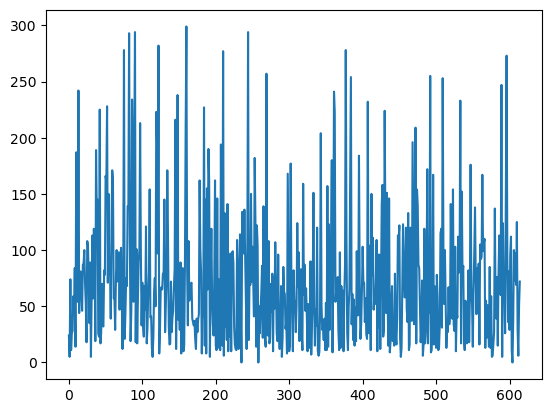

In [7]:
df['length'].plot()

<Axes: >

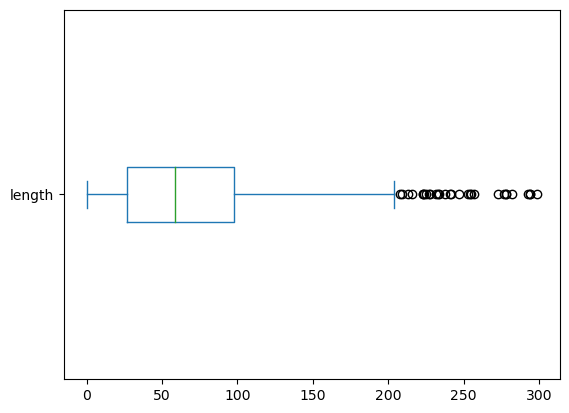

In [8]:
df['length'].plot(kind = 'box', vert = False)

<Axes: ylabel='Frequency'>

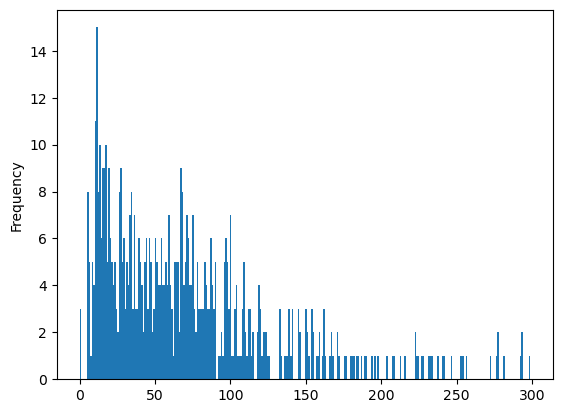

In [9]:
df['length'].plot(kind = 'hist', bins = 300)

# 3. Removing stopwords using regex

In [10]:
import regex as re
import nltk

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


{'such', "you'll", 'because', 'should', 'does', 'yourselves', 'too', 'up', "didn't", "shan't", 'was', 'shan', 'which', 'am', 'only', 'just', 'd', 'hadn', 'ours', 'most', 'ma', 'for', 't', 'they', 'above', 'a', 'both', 'not', 'y', "needn't", 'all', 'its', "you'd", 'that', 'who', 'by', 'once', 'there', 'each', 'your', 'from', 'his', "mustn't", 'you', 'on', 'then', 's', 'couldn', 'needn', 'than', 'nor', 'if', 'can', 'some', 'under', "couldn't", "hasn't", 'mustn', 'be', 'doing', 'ain', 'whom', "that'll", 'yours', 'during', 'an', 'when', 'hasn', 'now', "shouldn't", 'off', "hadn't", 'wouldn', 'been', 'mightn', 'further', 'again', "won't", "wasn't", "mightn't", 'shouldn', 'against', 'won', 'her', 'after', 'about', 'same', 'isn', 'themselves', 'more', 'himself', 'having', 'aren', 'this', 'he', 'over', 'to', 'or', "wouldn't", 're', 'll', "doesn't", 'own', 'she', 'didn', 'weren', 'will', 'the', 'haven', 'him', "you've", 'so', 'do', "she's", 'in', "haven't", 'hers', 'it', 'o', 'did', 'itself', 'w

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df['tokens'] = df['Titles'].apply(prepare, pipeline=pipeline)
df.head()

,Titles,length,tokens
0,KARI LAKE BRIBED???? PA2,24,"[kari, lake, bribed, pa2]"
1,Jeb!!,5,[jeb]
2,Donald Trump poised to be first Republican to ...,74,"[donald, trump, poised, first, republican, win..."
3,LET'S GO!!!,11,"[let, go]"
4,GOAT! AMERICA’S PRESIDENT,26,"[goat, america, president]"


## Word frequency

In [12]:
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('trump', 217), ('president', 54), ('donald', 47), ('new', 40), ('biden', 31)]


In [13]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
trump,217
president,54
donald,47
new,40
biden,31
border,29
says,21
election,20
haley,19


In [14]:
freq_df.describe()

,freq
count,2271.000000
mean,2.059886
std,5.279745
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,217.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

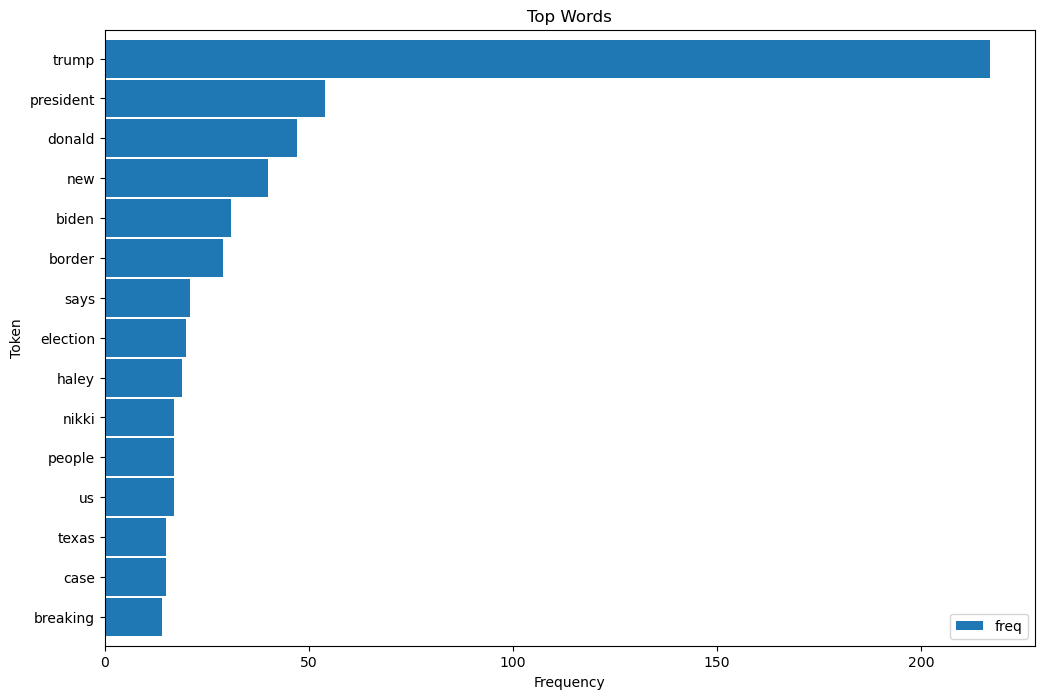

In [15]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Word cloud

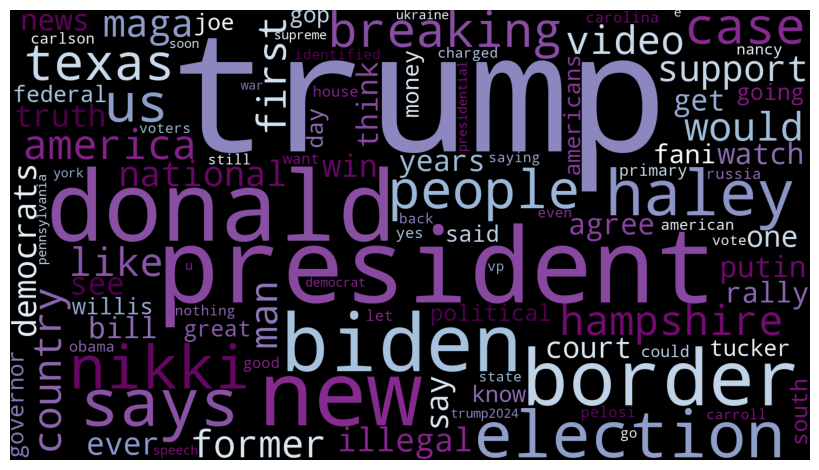

In [16]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from os import path
from PIL import Image


trump_mask = np.array(Image.open("trump.png"))

wc = WordCloud(background_color='black', contour_color = 'black',mask = trump_mask, colormap = 'BuPu_r', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# 4. Using regex on example strings

In [17]:
example_strings = [
    "andanala.rohith357@gmail.com",
    "Users/rohit/Dropbox/shu data science/sem 2/txtbasedanalysis/textBasedAnalysis/week1.ipynb",
    "https://github.com/rohithandanala/textBasedAnalysis",
    "2024-02-14",
    "192.168.1.1"
]

email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
ip_pattern = r'^(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'
date_pattern = r'^\d{4}-\d{2}-\d{2}$'
file_path_pattern = r'(?:\/[^\/\s]+)+'
url_pattern = r'^(https?|ftp):\/\/[^\s/$.?#].[^\s]*$'


for i in example_strings:
    if re.match(email_pattern, i):
        print(f"{i} is a valid email address.")
    elif re.match(file_path_pattern, i):
        print(f"{i} is a valid file path.")
    elif re.match(url_pattern, i):
        print(f"{i} is a valid URL.")
    elif re.match(date_pattern, i):
        print(f"{i} is a valid date in ISO 8601 format.")
    elif re.match(ip_pattern, i):
        print(f"{i} is a valid IPv4 address.")
    else:
        print(f"{i} doesn't match any known pattern.")

andanala.rohith357@gmail.com is a valid email address.
Users/rohit/Dropbox/shu data science/sem 2/txtbasedanalysis/textBasedAnalysis/week1.ipynb doesn't match any known pattern.
https://github.com/rohithandanala/textBasedAnalysis is a valid URL.
2024-02-14 is a valid date in ISO 8601 format.
192.168.1.1 is a valid IPv4 address.


## 5. Sentimental analysis

In [18]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,length,tokens,Subjectivity,Polarity,Insight
0,KARI LAKE BRIBED???? PA2,24,"[kari, lake, bribed, pa2]",0.000000,0.000000,Neutral
1,Jeb!!,5,[jeb],0.000000,0.000000,Neutral
2,Donald Trump poised to be first Republican to ...,74,"[donald, trump, poised, first, republican, win...",0.544444,0.550000,Positive
3,LET'S GO!!!,11,"[let, go]",0.000000,0.000000,Neutral
4,GOAT! AMERICA’S PRESIDENT,26,"[goat, america, president]",0.000000,0.000000,Neutral
5,Trump is the people's champ,28,"[trump, people, champ]",0.000000,0.000000,Neutral
6,Donald Trump rages at Republicans losing Georg...,59,"[donald, trump, rages, republicans, losing, ge...",0.000000,0.000000,Neutral
7,I base friendship on there opinion of trump,43,"[base, friendship, opinion, trump]",1.000000,-0.800000,Negative
8,"Prince Andrew's Ex Blows Whistle, Says Jeffrey...",84,"[prince, andrew, ex, blows, whistle, says, jef...",0.000000,0.000000,Neutral
9,Please Join Us,14,"[please, join, us]",0.000000,0.000000,Neutral


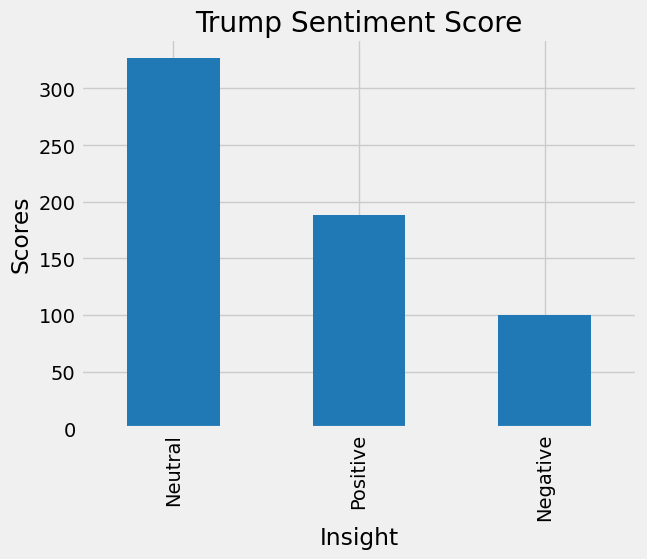

In [19]:
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
plt.title("Trump Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# 6. Bing liu score 

In [20]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',opinion_lexicon.negative()[:10])

Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [21]:
pos_score = 1
neg_score = -1
word_dict = {}

for word in opinion_lexicon.positive():
    word_dict[word] = pos_score


for word in opinion_lexicon.negative():
    word_dict[word] = neg_score
    
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

df['Bing_Liu_Score'] = df['Titles'].apply(bing_liu_score)

In [22]:
df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,KARI LAKE BRIBED???? PA2,0
1,Jeb!!,0
2,Donald Trump poised to be first Republican to ...,4
3,LET'S GO!!!,0
4,GOAT! AMERICA’S PRESIDENT,0
5,Trump is the people's champ,2
6,Donald Trump rages at Republicans losing Georg...,0
7,I base friendship on there opinion of trump,1
8,"Prince Andrew's Ex Blows Whistle, Says Jeffrey...",0
9,Please Join Us,0
